# Week 2

As explained in the [Before week 1: How to take this class](https://nbviewer.org/github/suneman/socialdata2022/blob/main/lectures/How_To_Take_This_Class.ipynb) notebook, each week of this class is an Jupyter notebook like this one. In order to follow the class, you simply start reading from the top, following the instructions.

Hint: you can ask us - Anna or any of the friendly Teaching Assistants - for help at any point if you get 
stuck!

**New Info**: Remember that this week is also the time to learn a bit about how the the assignments and the final project work. So if you havn't already, check out the [Before week 2: Assignments and Final Project](https://github.com/suneman/socialdata2022/blob/main/lectures/Assignments_And_Final_Project.ipynb) notebook.

## Overview

Today's lecture has 3 parts. 
* First we'll give you an introduction to data visualization with a little data visualization exercise and a video from Sune. 
* As the main event, we will work with crime-data and generate a large number of interesting and informative plots. 
* Finally - in the last part - we'll play around with visualizing the geo-data contained in the CSV file.

## Part 1: A little visualization exercise

Start by downloading these four datasets: [Data 1](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/data1.tsv), [Data 2](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/data2.tsv), [Data 3](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/data3.tsv), and [Data 4](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/data4.tsv). The format is `.tsv`, which stands for _tab separated values_. 
As you will later realize, these are famous datasets!
Each file has two columns (separated using the tab character). The first column is $x$-values, and the second column is $y$-values.  

It's ok to just download these files to disk by right-clicking on each one, but if you use Python and `urllib` or `urllib2` to get them, I'll really be impressed. If you don't know how to do that, I recommend opening up Google and typing "download file using Python" or something like that. When interpreting the search results remember that _stackoverflow_ is your friend.


In [1]:
# 1.0 import data

import requests
import pandas as pd
import io

data = pd.DataFrame()

for i in range(4):

    URL = f'https://raw.githubusercontent.com/suneman/socialdata2022/main/files/data{i+1}.tsv'

    urlData = requests.get(URL).content
    rawData = pd.read_csv(io.StringIO(urlData.decode('utf-8')), sep='\t')
    rawData.columns = ['x_values', 'y_values']
    rawData['data_set'] = i+1
    rawData = rawData[['data_set', 'x_values', 'y_values']]

    if i == 0:
        data = rawData
    else:
        data = pd.concat([data, rawData])


Now, to the exercise:

> *Exercise 1.1*: 
> 
> * Using the `numpy` function `mean`, calculate the mean of both $x$-values and $y$-values for each dataset. 
>      * Use python string formatting to print precisely two decimal places of these results to the output cell. Check out [this _stackoverflow_ page](http://stackoverflow.com/questions/8885663/how-to-format-a-floating-number-to-fixed-width-in-python) for help with the string formatting. 
> * Now calculate the variance for all of the various sets of $x$- and $y$-values, by using the `numpy` function `var`. Print it to three decimal places.
> * Use `numpy` to calculate the [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient) between $x$- and $y$-values for all four data sets (also print to three decimal places).
> * The next step is use _linear regression_ to fit a straight line $f(x) = a x + b$ through each dataset and report $a$ and $b$ (to two decimal places). An easy way to fit a straight line in Python is using `scipy`'s `linregress`. It works like this
> ```
> from scipy import stats
> slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
>```
> * Comment on the results from the previous steps. What do you observe? 
> * Finally, it's time to plot the four datasets using `matplotlib.pyplot`. Use a two-by-two [`subplot`](http://matplotlib.org/examples/pylab_examples/subplot_demo.html) to put all of the plots nicely in a grid and use the same $x$ and $y$ range for all four plots. And include the linear fit in all four plots. (To get a sense of what I think the plot should look like, you can take a look at my version [here](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/anscombe.png).)
> * Explain - in your own words - what you think my point with this exercise is (see below for tips on this).


Get more insight in the ideas behind this exercise by reading [here](https://en.wikipedia.org/wiki/Anscombe%27s_quartet). Here you can also get an explanation of why the datasets are actually famous - I mean they have their own Wikipedia page!!

And the video below generalizes in the coolest way imaginable. It's a treat, but don't watch it until **after** you've done the exercises - and read the Wikipedia page. **Note:** Uncomment the line in the cell below to watch the video!

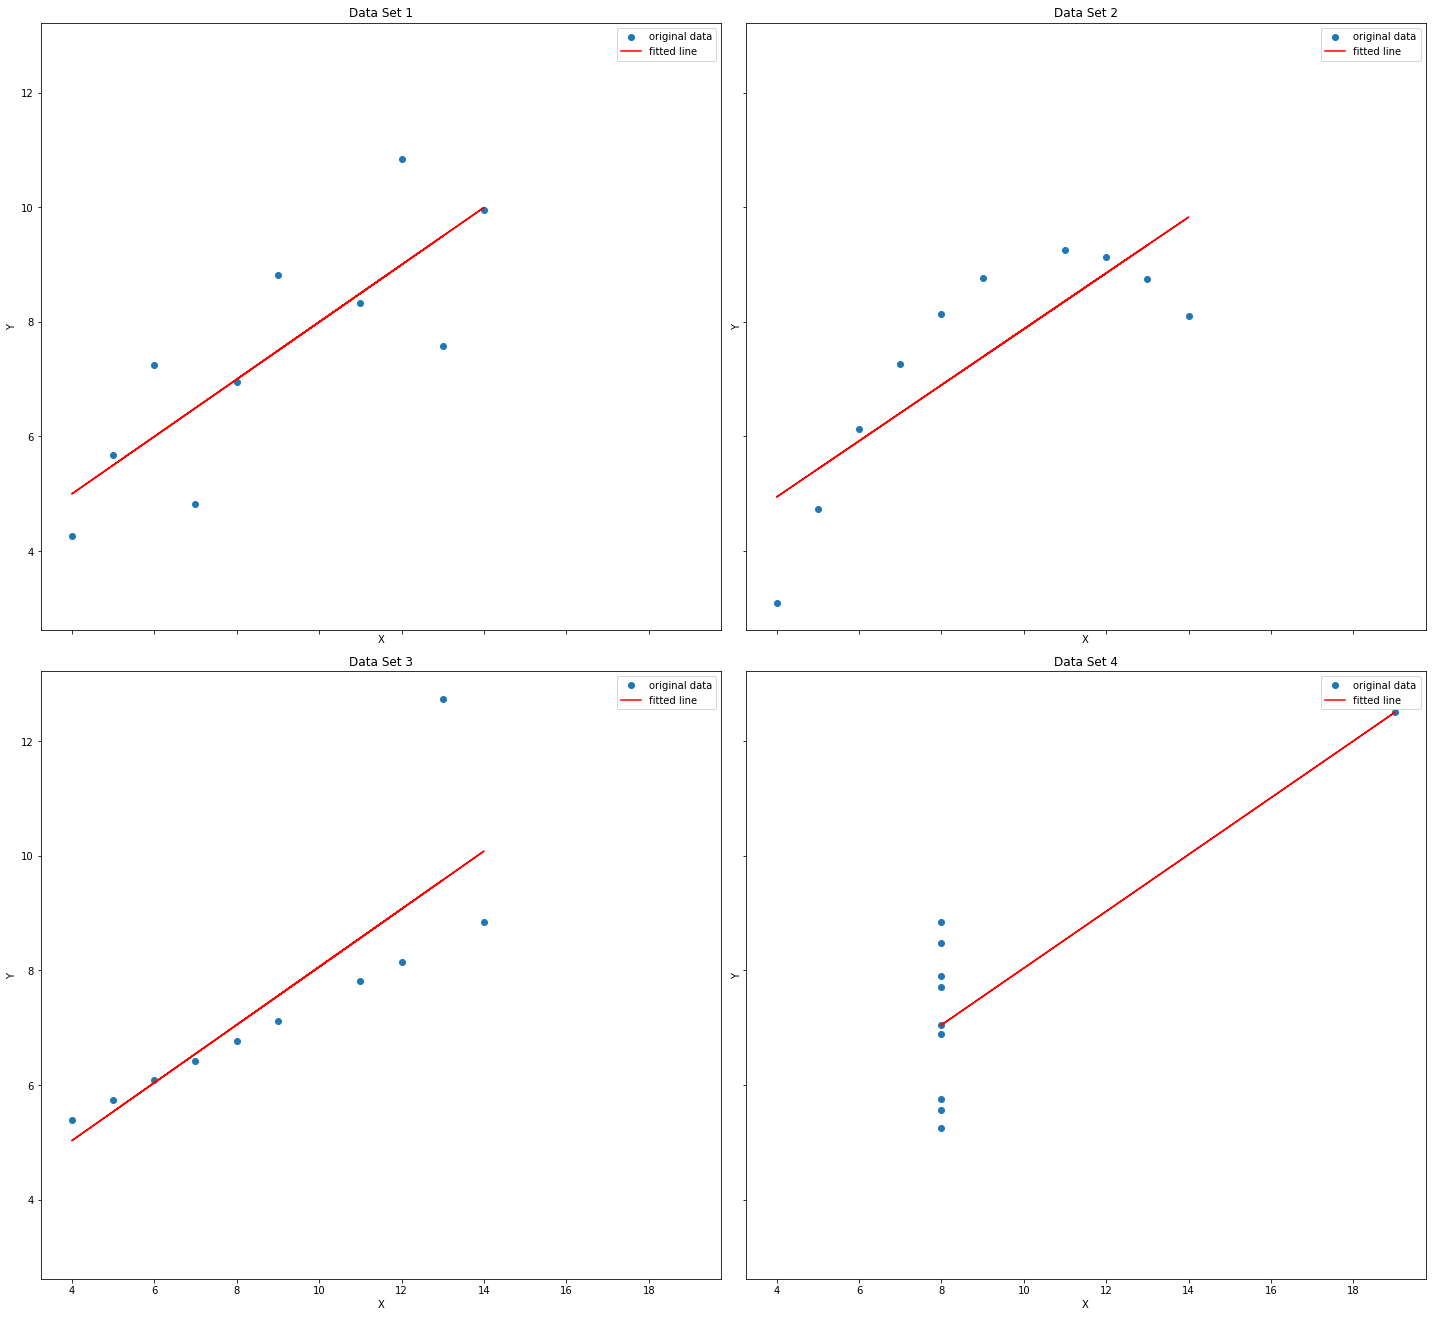

In [2]:
# 1.1 

# mean of each data set using numpy + round to two decimal places
mean_of_data_set = data.groupby('data_set').agg({'x_values':'mean', 'y_values':'mean'}).round(2)\
    .rename(columns={'x_values':'mean_of_x', 'y_values':'mean_of_y'}).reset_index()
variance_of_data_set = data.groupby('data_set').agg({'x_values':'var', 'y_values':'var'}).round(3)\
    .rename(columns={'x_values':'var_of_x', 'y_values':'var_of_y'}).reset_index()
correlation_of_data_set = data.groupby('data_set').corr(method='pearson').round(3)

# regression
from scipy import stats
import numpy as np
for i in range(1,5):
    data_loop = data.loc[data['data_set'] == i]
    regression = stats.linregress(x=data_loop['x_values'],y=data_loop['y_values'])
    regression = pd.DataFrame(np.transpose(regression), columns= [i], index = ['slope', 'intercept', 'rvalue', 'pvalue', 'stderr'])
    
    if i == 1:
        regression_data = regression
    else:    
        regression_data = pd.concat([regression_data, regression], axis = 1)

regression_data = regression_data.T

# plot
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 20), sharex=True, sharey=True)

m = 0 # falls n = 1 -> m + 1 und nach plot n wieder auf 0 setzen
n = 0 # 0 oder 1

for i in range(1,5):
    data_loop = data.loc[data['data_set'] == i]
    regression_loop = regression_data.loc[[i]]
    if n == 1:
        axs[m,n].scatter(x=data_loop['x_values'], y=data_loop['y_values'], label='original data')
        axs[m,n].plot(data_loop['x_values'], regression_loop['intercept'].values + regression_loop['slope'].values*data_loop['x_values'].values, 'r', label='fitted line')
        axs[m,n].legend()
        axs[m,n].set_title(f'Data Set {i}')
        axs[m,n].set_xlabel('X')
        axs[m,n].set_ylabel('Y')
        m = m + 1
        n = 0
    else:
        axs[m,n].scatter(x=data_loop['x_values'], y=data_loop['y_values'], label='original data')
        axs[m,n].plot(data_loop['x_values'], regression_loop['intercept'].values + regression_loop['slope'].values*data_loop['x_values'].values, 'r', label='fitted line')
        axs[m,n].legend()
        axs[m,n].set_title(f'Data Set {i}')
        axs[m,n].set_xlabel('X')
        axs[m,n].set_ylabel('Y')
        n = 1

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [3]:
from IPython.display import YouTubeVideo
#Uncomment the following line to watch the video
#YouTubeVideo("DbJyPELmhJc",width=800, height=450)

Now that you get a better sense of why data visualization is an important and powerful tool, you are ready to get a small intro on the topic! Again, don't watch the video until **after** you've done exercise 1.1 

[![IMAGE ALT TEXT HERE](https://img.youtube.com/vi/9D2aI30AMhM/0.jpg)](https://www.youtube.com/watch?v=9D2aI30AMhM)

> *Excercise 1.2:* Questions for the lecture
> * What is the difference between *data* and *metadata*? How does that relate to the GPS tracks-example?
> * Sune says that the human eye is a great tool for data analysis. Do you agree? Explain why/why not. Mention something that the human eye is very good at. Can you think of something that [is difficult for the human eye](http://cdn.ebaumsworld.com/mediaFiles/picture/718392/84732652.jpg). Explain why your example is difficult. 
> * Simpson's paradox is hard to explain. Come up with your own example - or find one on line.
> * In your own words, explain the differnece between *exploratory* and *explanatory* data analysis. 


## Part 2: Visualizing patterns in the data

Visualizing data is a powerful technique that helps us exploiting the human eye, and make complex patterns easier to identify. 

Let's see if we can detect any interesting patterns in the big crime-data file from San Francisco you downloaded last week. We'll again only look at the focus-crimes.

> *Exercise 2.1*: More temporal patterns. Last time we plotted the development over time (how each of the focus crimes changed over time, year-by-year). Today we'll start by looking at the developments across the months, weekdays, and across the 24 hours of the day. 
>
> **Note:** restrict yourself to the dataset of *entire years*.
>
> * *Weekly patterns*. Basically, we'll forget about the yearly variation and just count up what happens during each weekday. [Here's what my version looks like](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/weekdays.png). Some things make sense - for example `drunkenness` and the weekend. But there are some aspects that were surprising to me. Check out `prostitution` and mid-week behavior, for example!?
> * *The months*. We can also check if some months are worse by counting up number of crimes in Jan, Feb, ..., Dec. Did you see any surprises there?
> * *The 24 hour cycle*. We can also forget about weekday and simply count up the number of each crime-type that occurs in the dataset from midnight to 1am, 1am - 2am ... and so on. Again: Give me a couple of comments on what you see. 
> * *Hours of the week*. But by looking at just 24 hours, we may be missing some important trends that can be modulated by week-day, so let's also check out the 168 hours of the week. So let's see the number of each crime-type Monday night from midninght to 1am, Monday night from 1am-2am - all the way to Sunday night from 11pm to midnight.


In [4]:
# import 
import pandas as pd
import numpy as np
from pathlib import Path

# read police incidence reports, historical 2003 to may 2018
police_incidence_reports = pd.read_csv(Path.cwd().parent/"files"/"Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")
police_incidence_reports = pd.DataFrame(police_incidence_reports)
police_incidence_reports_2003_till_2017 = police_incidence_reports[~(pd.DatetimeIndex(police_incidence_reports['Date']).year > 2017)]

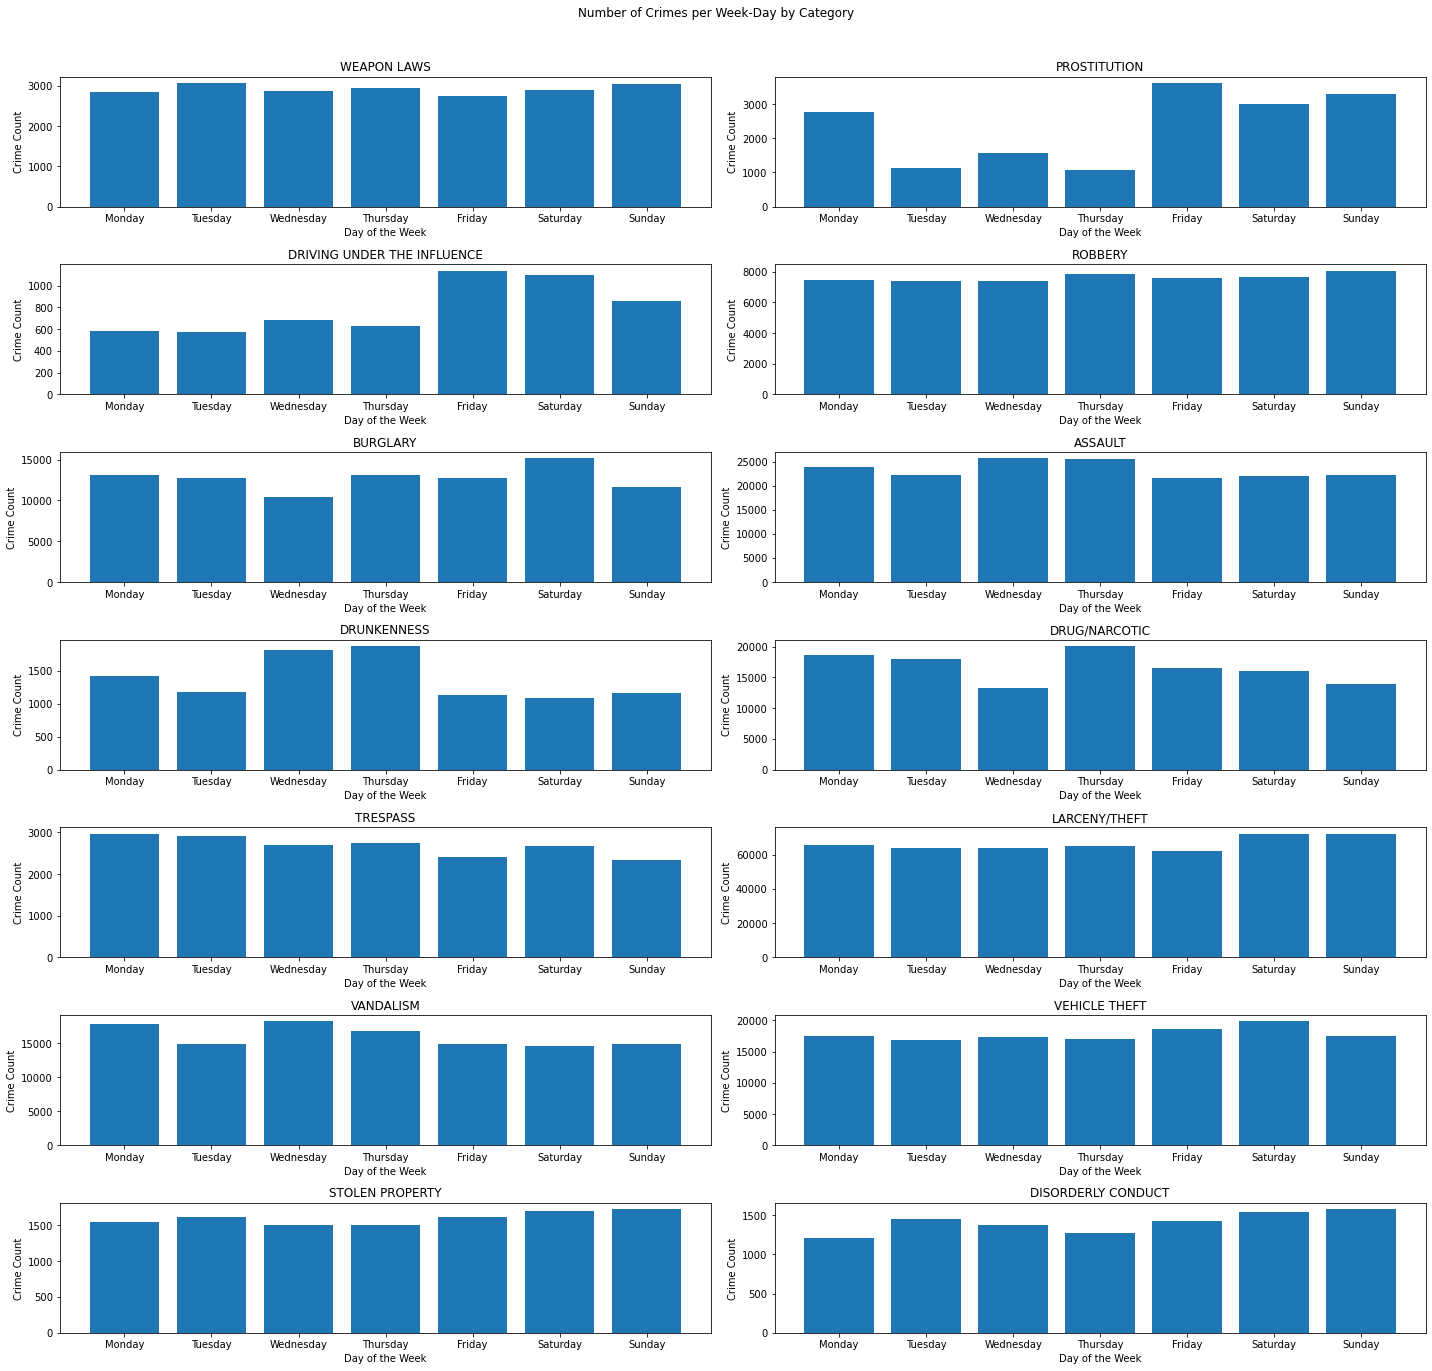

In [5]:
focuscrimes = pd.DataFrame(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])
focuscrimes.columns = ['Category']
focuscrimes = pd.merge(focuscrimes, police_incidence_reports_2003_till_2017, on = 'Category')
focuscrimes.sort_values(by=['Category', 'Date'])

# focuscrimes by category and weekday
focuscrimes_by_category_weekday = focuscrimes.groupby(['Category', 'DayOfWeek']).agg({'PdId':'count'})\
    .sort_values(by=['Category']).rename(columns={'PdId':'Counts'}).reset_index()

cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(20, 20))

m = 0 # falls n = 1 -> m + 1 und nach plot n wieder auf 0 setzen
n = 0 # 0 oder 1
for i in focuscrimes['Category'].unique():
    if n == 1:
        y = focuscrimes_by_category_weekday.loc[focuscrimes_by_category_weekday['Category'].isin([i])]
        axs[m,n].bar(x = cats, height = y['Counts'])
        axs[m,n].set_title(i)
        axs[m,n].set_xlabel('Day of the Week')
        axs[m,n].set_ylabel('Crime Count')
        m = m + 1
        n = 0
    else:
        y = focuscrimes_by_category_weekday.loc[focuscrimes_by_category_weekday['Category'].isin([i])]
        axs[m,n].bar(x = cats, height = y['Counts'])
        axs[m,n].set_title(i)
        axs[m,n].set_xlabel('Day of the Week')
        axs[m,n].set_ylabel('Crime Count')
        n = 1
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle('Number of Crimes per Week-Day by Category')
plt.show()

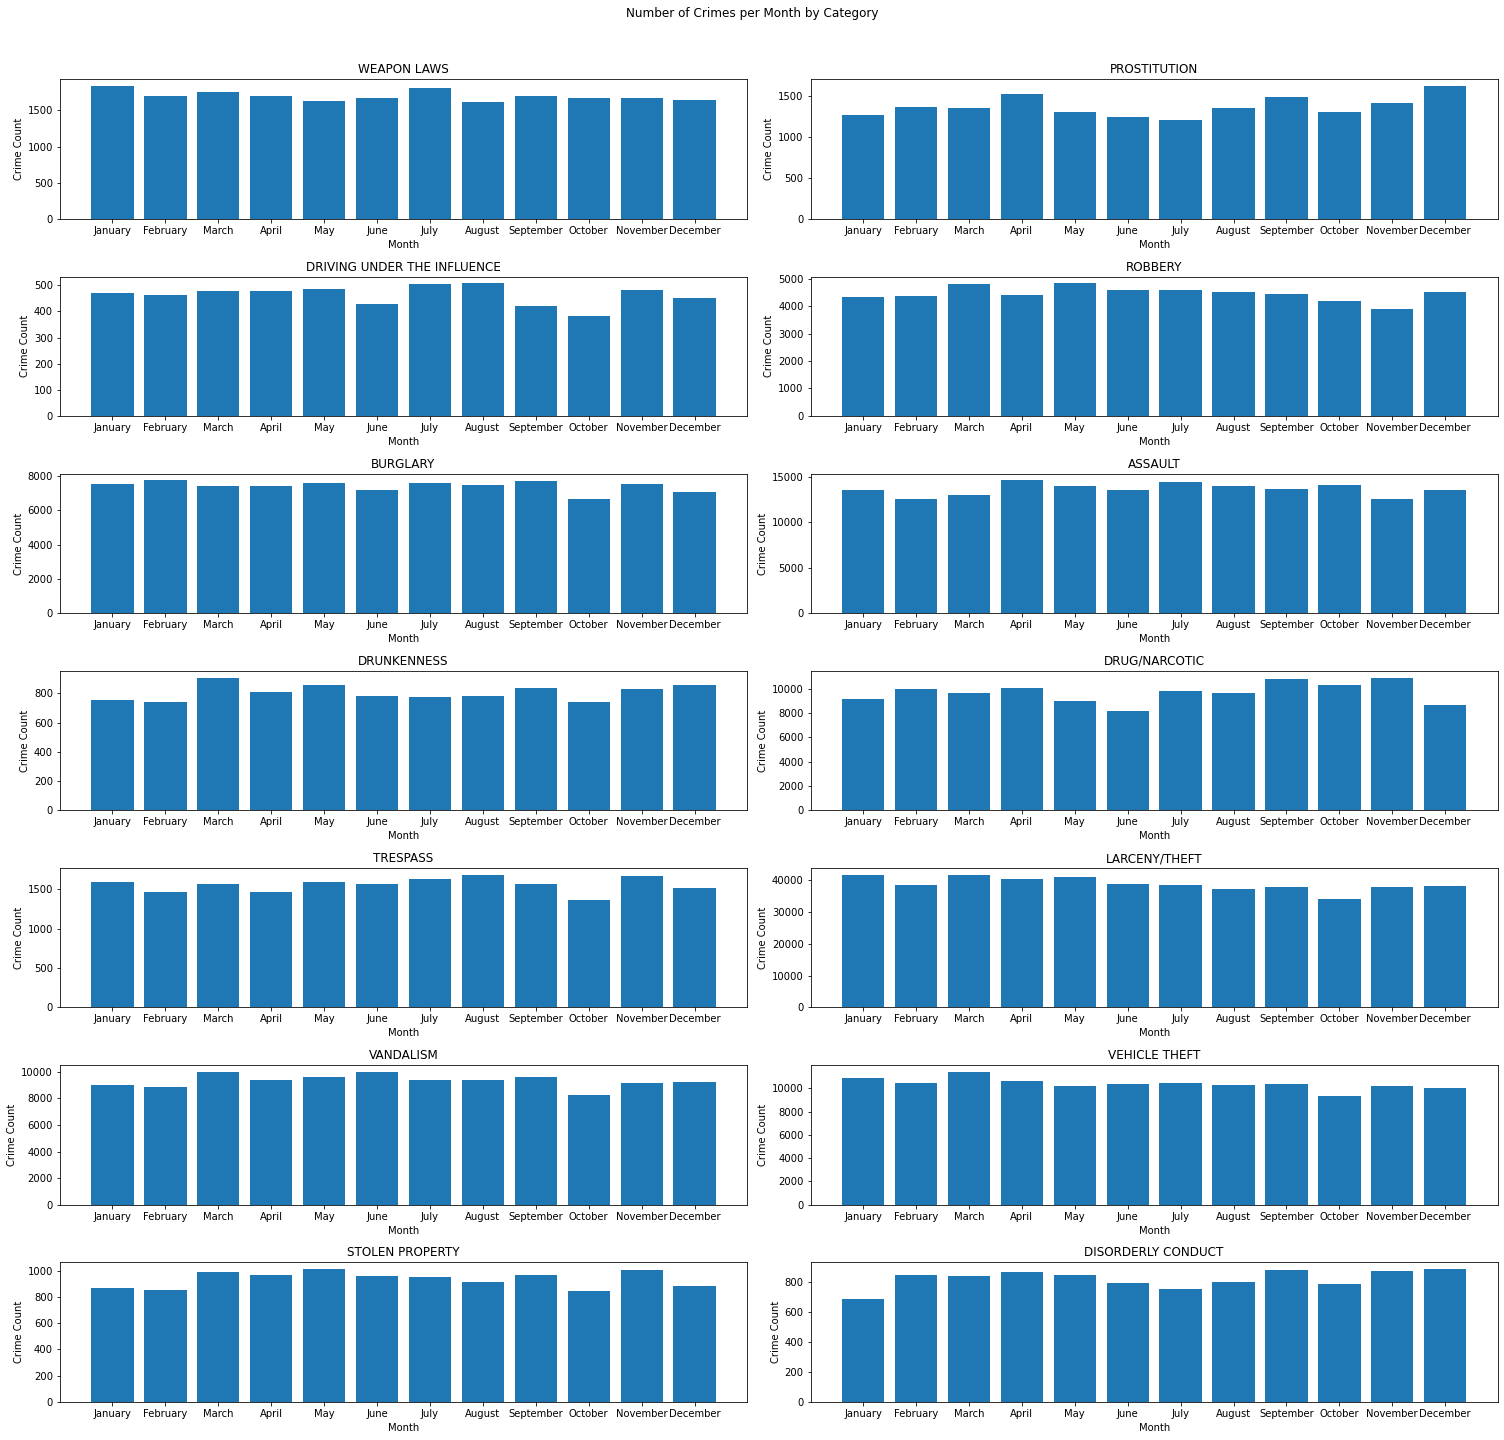

In [6]:
# focuscrimes by category and month
focuscrimes['Month'] = pd.DatetimeIndex(focuscrimes['Date']).month

focuscrimes_by_category_month = focuscrimes.groupby(['Category', 'Month']).agg({'PdId':'count'})\
    .sort_values(by=['Category']).rename(columns={'PdId':'Counts'}).reset_index()

cats = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(21, 21))

m = 0 # falls n = 1 -> m + 1 und nach plot n wieder auf 0 setzen
n = 0 # 0 oder 1
for i in focuscrimes['Category'].unique():
    if n == 1:
        y = focuscrimes_by_category_month.loc[focuscrimes_by_category_month['Category'].isin([i])]
        axs[m,n].bar(x = cats, height = y['Counts'])
        axs[m,n].set_title(i)
        axs[m,n].set_xlabel('Month')
        axs[m,n].set_ylabel('Crime Count')
        m = m + 1
        n = 0
    else:
        y = focuscrimes_by_category_month.loc[focuscrimes_by_category_month['Category'].isin([i])]
        axs[m,n].bar(x = cats, height = y['Counts'])
        axs[m,n].set_title(i)
        axs[m,n].set_xlabel('Month')
        axs[m,n].set_ylabel('Crime Count')
        n = 1
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle('Number of Crimes per Month by Category')
plt.show()


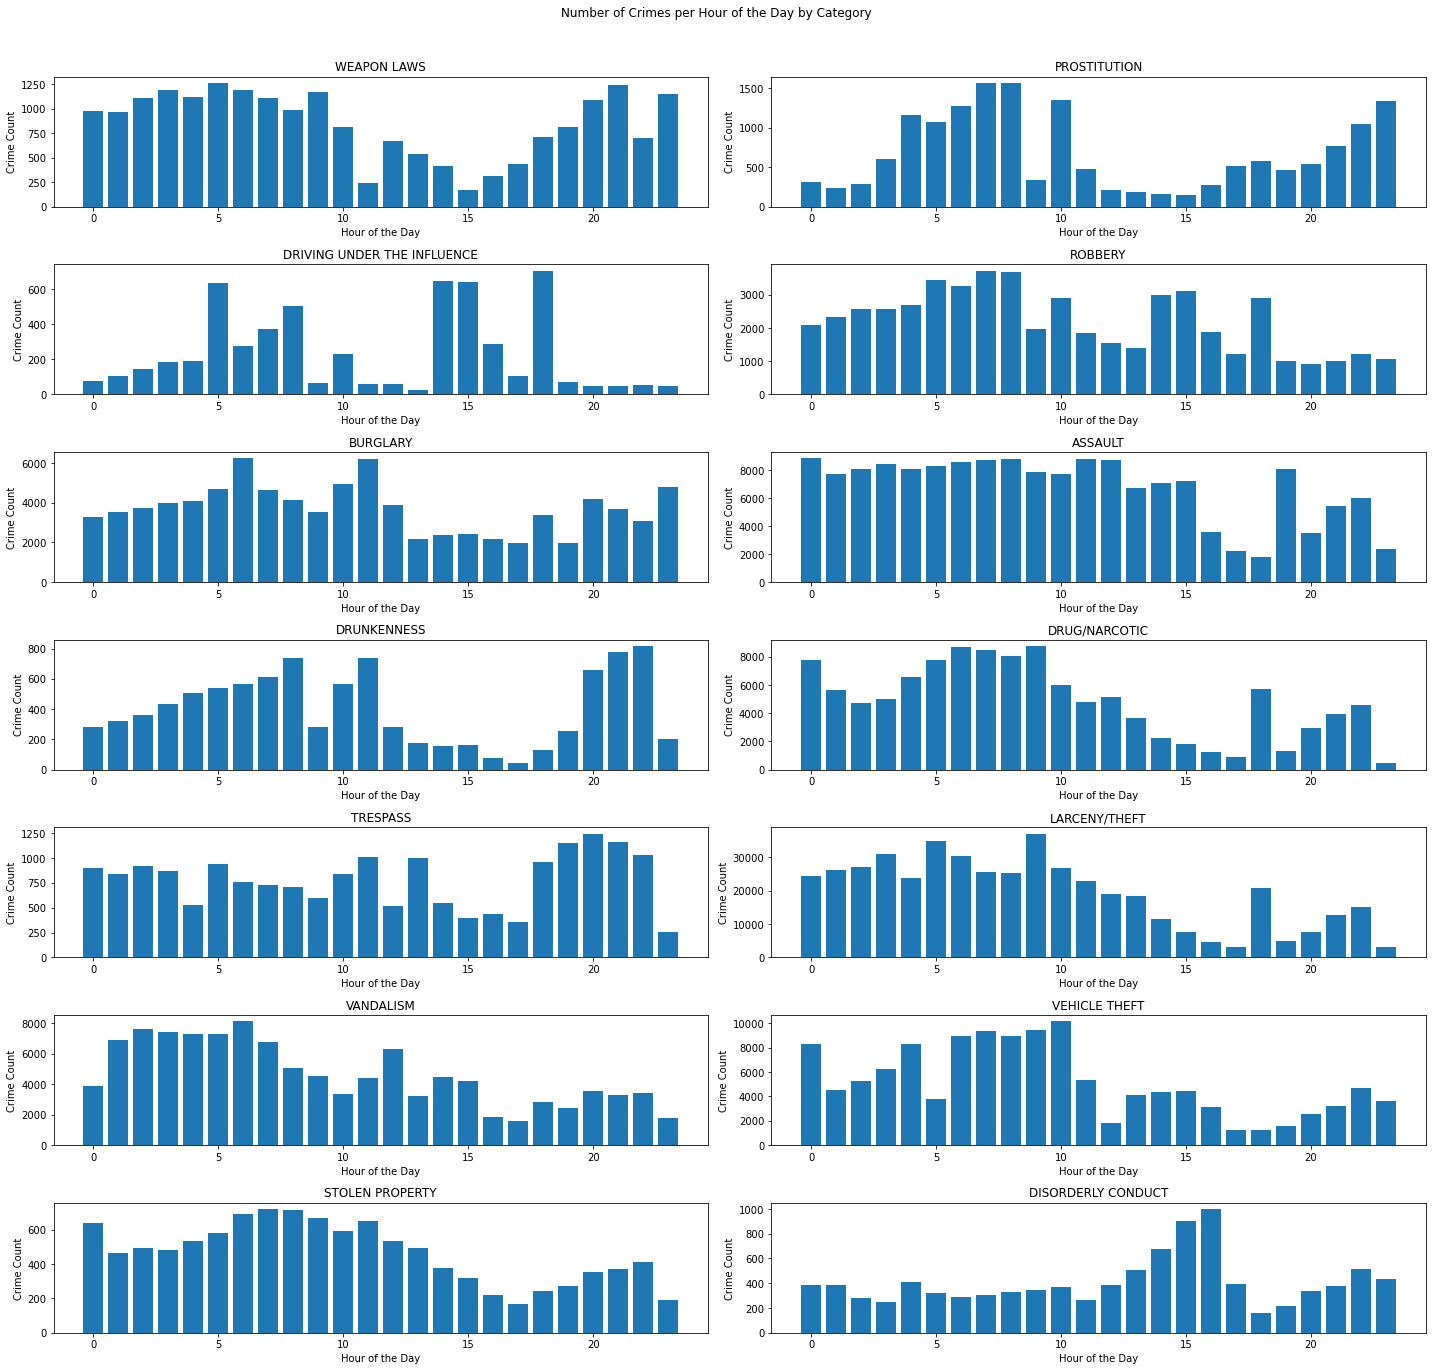

In [7]:

# focuscrimes by category and hour of the day
focuscrimes['Datetime'] = pd.to_datetime(focuscrimes['Date']+ ' ' + focuscrimes['Time'])
focuscrimes['Hour'] = focuscrimes['Datetime'].dt.hour

test = focuscrimes['Hour'].unique()

focuscrimes_by_category_hour_of_day = focuscrimes.groupby(['Category', 'Hour']).agg({'PdId':'count'})\
    .sort_values(by=['Category']).rename(columns={'PdId':'Counts'}).reset_index()

cats = range(0,24,1)

fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(20, 20))

m = 0 # falls n = 1 -> m + 1 und nach plot n wieder auf 0 setzen
n = 0 # 0 oder 1
for i in focuscrimes['Category'].unique():
    if n == 1:
        y = focuscrimes_by_category_hour_of_day.loc[focuscrimes_by_category_hour_of_day['Category'].isin([i])]
        axs[m,n].bar(x = cats, height = y['Counts'])
        axs[m,n].set_title(i)
        axs[m,n].set_xlabel('Hour of the Day')
        axs[m,n].set_ylabel('Crime Count')
        m = m + 1
        n = 0
    else:
        y = focuscrimes_by_category_hour_of_day.loc[focuscrimes_by_category_hour_of_day['Category'].isin([i])]
        axs[m,n].bar(x = cats, height = y['Counts'])
        axs[m,n].set_title(i)
        axs[m,n].set_xlabel('Hour of the Day')
        axs[m,n].set_ylabel('Crime Count')
        n = 1
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle('Number of Crimes per Hour of the Day by Category')
plt.show()

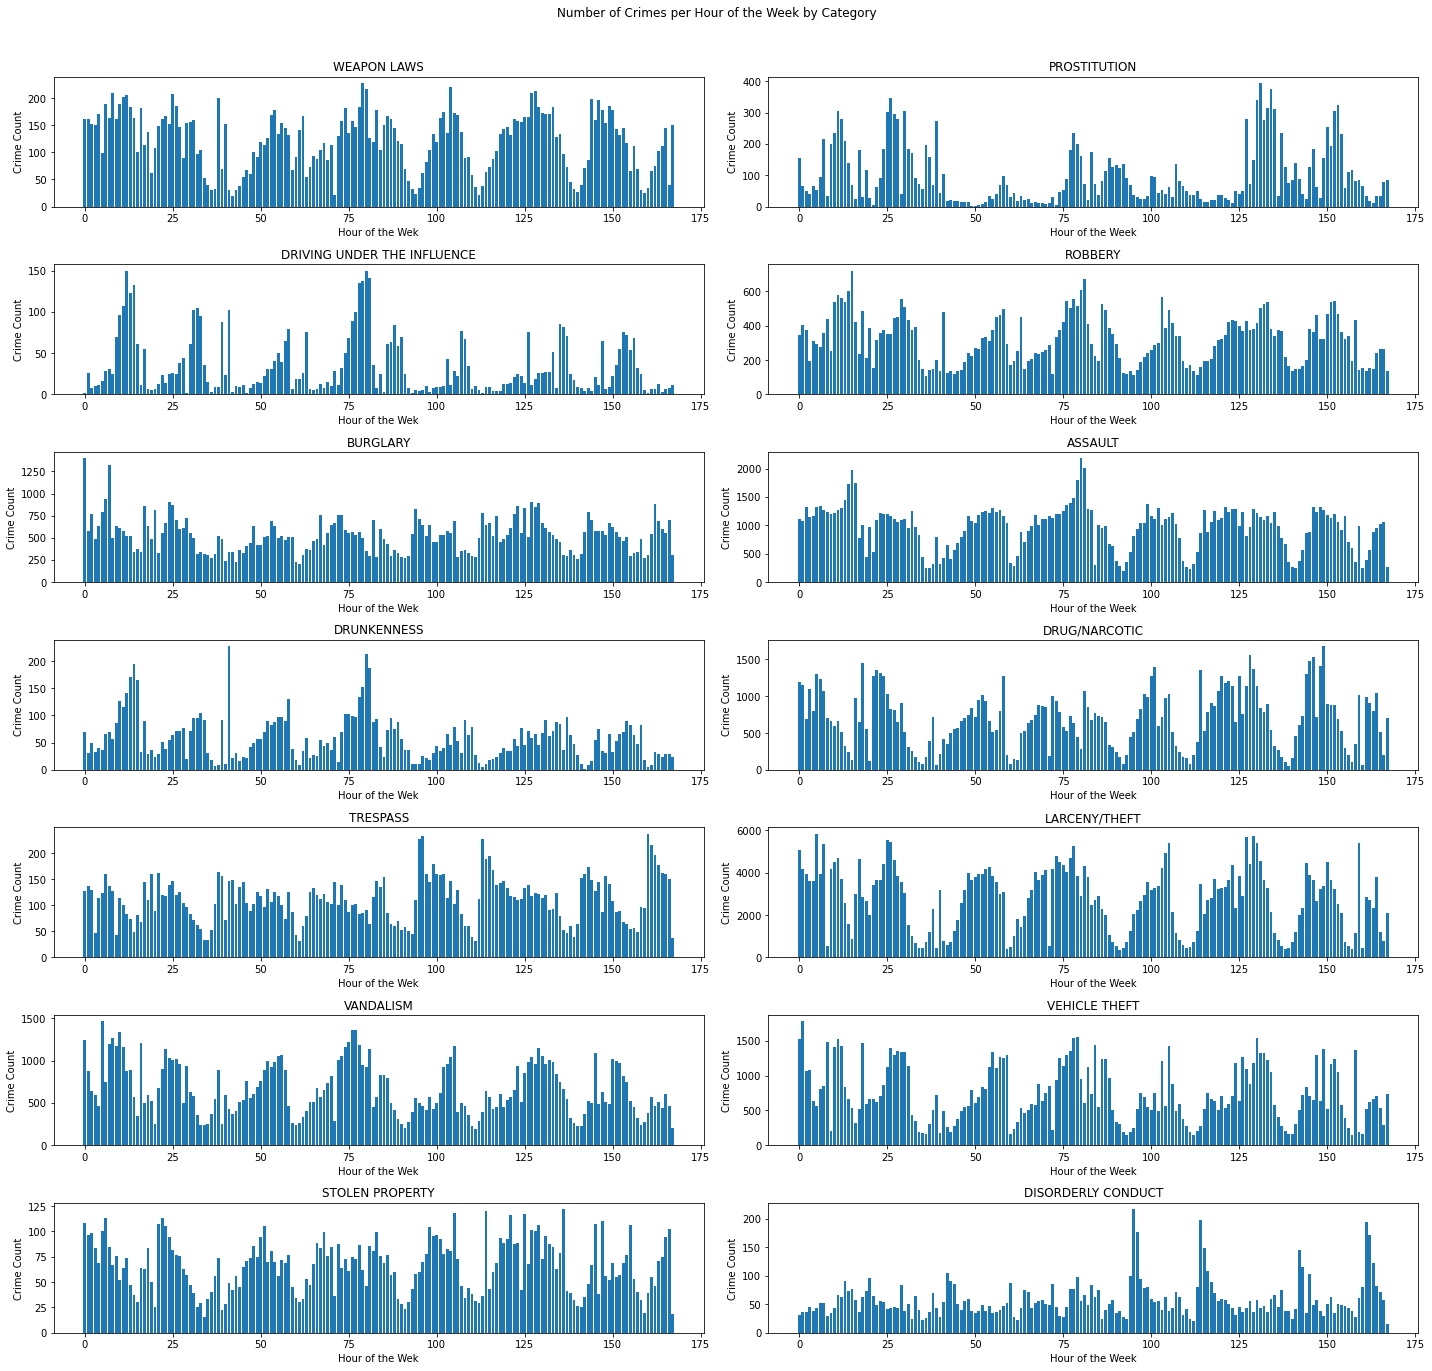

In [8]:

# focuscrimes by category and hour of the week
focuscrimes['Hour_of_the_Week'] = focuscrimes['Datetime'].dt.dayofweek * 24 + (focuscrimes['Datetime'].dt.hour + 1)

focuscrimes_by_category_hour_of_week = focuscrimes.groupby(['Category', 'Hour_of_the_Week']).agg({'PdId':'count'})\
    .sort_values(by=['Category']).rename(columns={'PdId':'Counts'}).reset_index()

cats = range(0,168,1)

fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(20, 20))

m = 0 # falls n = 1 -> m + 1 und nach plot n wieder auf 0 setzen
n = 0 # 0 oder 1
for i in focuscrimes['Category'].unique():
    if n == 1:
        y = focuscrimes_by_category_hour_of_week.loc[focuscrimes_by_category_hour_of_week['Category'].isin([i])]
        axs[m,n].bar(x = cats, height = y['Counts'])
        axs[m,n].set_title(i)
        axs[m,n].set_xlabel('Hour of the Week')
        axs[m,n].set_ylabel('Crime Count')
        m = m + 1
        n = 0
    else:
        y = focuscrimes_by_category_hour_of_week.loc[focuscrimes_by_category_hour_of_week['Category'].isin([i])]
        axs[m,n].bar(x = cats, height = y['Counts'])
        axs[m,n].set_title(i)
        axs[m,n].set_xlabel('Hour of the Wek')
        axs[m,n].set_ylabel('Crime Count')
        n = 1
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle('Number of Crimes per Hour of the Week by Category')
plt.show()



The next thing we'll be looking into is how crimes break down across the 10 districts in San Francisco.

> *Exercise 2.2*: The types of crime and how they take place across San Francisco's police districts.
>  
>  * So now we'll be combining information about `PdDistrict` and `Category` to explore differences between SF's neighborhoods. First, simply list the names of SF's 10 police districts.
>  * Which has the most crimes? Which has the most focus crimes?
>  * Next, we want to generate a slightly more complicated graphic. I'm interested to know if there are certain crimes that happen much more in certain neighborhoods than what's typical. Below I describe how to get that plot going:
>    - First, we need to calculate the relative probabilities of seeing each type of crime in the dataset as a whole. That's simply a normalized version of [this plot](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/CrimeOccurrencesByCategory.png). Let's call it `P(crime)`.
>    - Next, we calculate that same probability distribution _but for each PD district_, let's call that `P(crime|district)`.
>    - Now we look at the ratio `P(crime|district)/P(crime)`. That ratio is equal to 1 if the crime occurs at the same level within a district as in the city as a whole. If it's greater than one, it means that the crime occurs _more frequently_ within that district. If it's smaller than one, it means that the crime is _rarer within the district in question_ than in the city as a whole.
>    - For each district plot these ratios for the 14 focus crimes. My plot looks like this
> ![Histograms](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/conditional.png "histograms")
>    - Comment on the top crimes in _Tenderloin_, _Mission_, and _Richmond_. Does this fit with the impression you get of these neighborhoods on Wikipedia?

**Comment**. Notice how much awesome datascience (i.e. learning about interesting real-world crime patterns) we can get out by simply counting and plotting (and looking at ratios). Pretty great, right? However, when generating meaningful visualizations, we need to be wary of *perceptual errors*. We'll have a look at this in the final exercise while also having fun with some geodata!

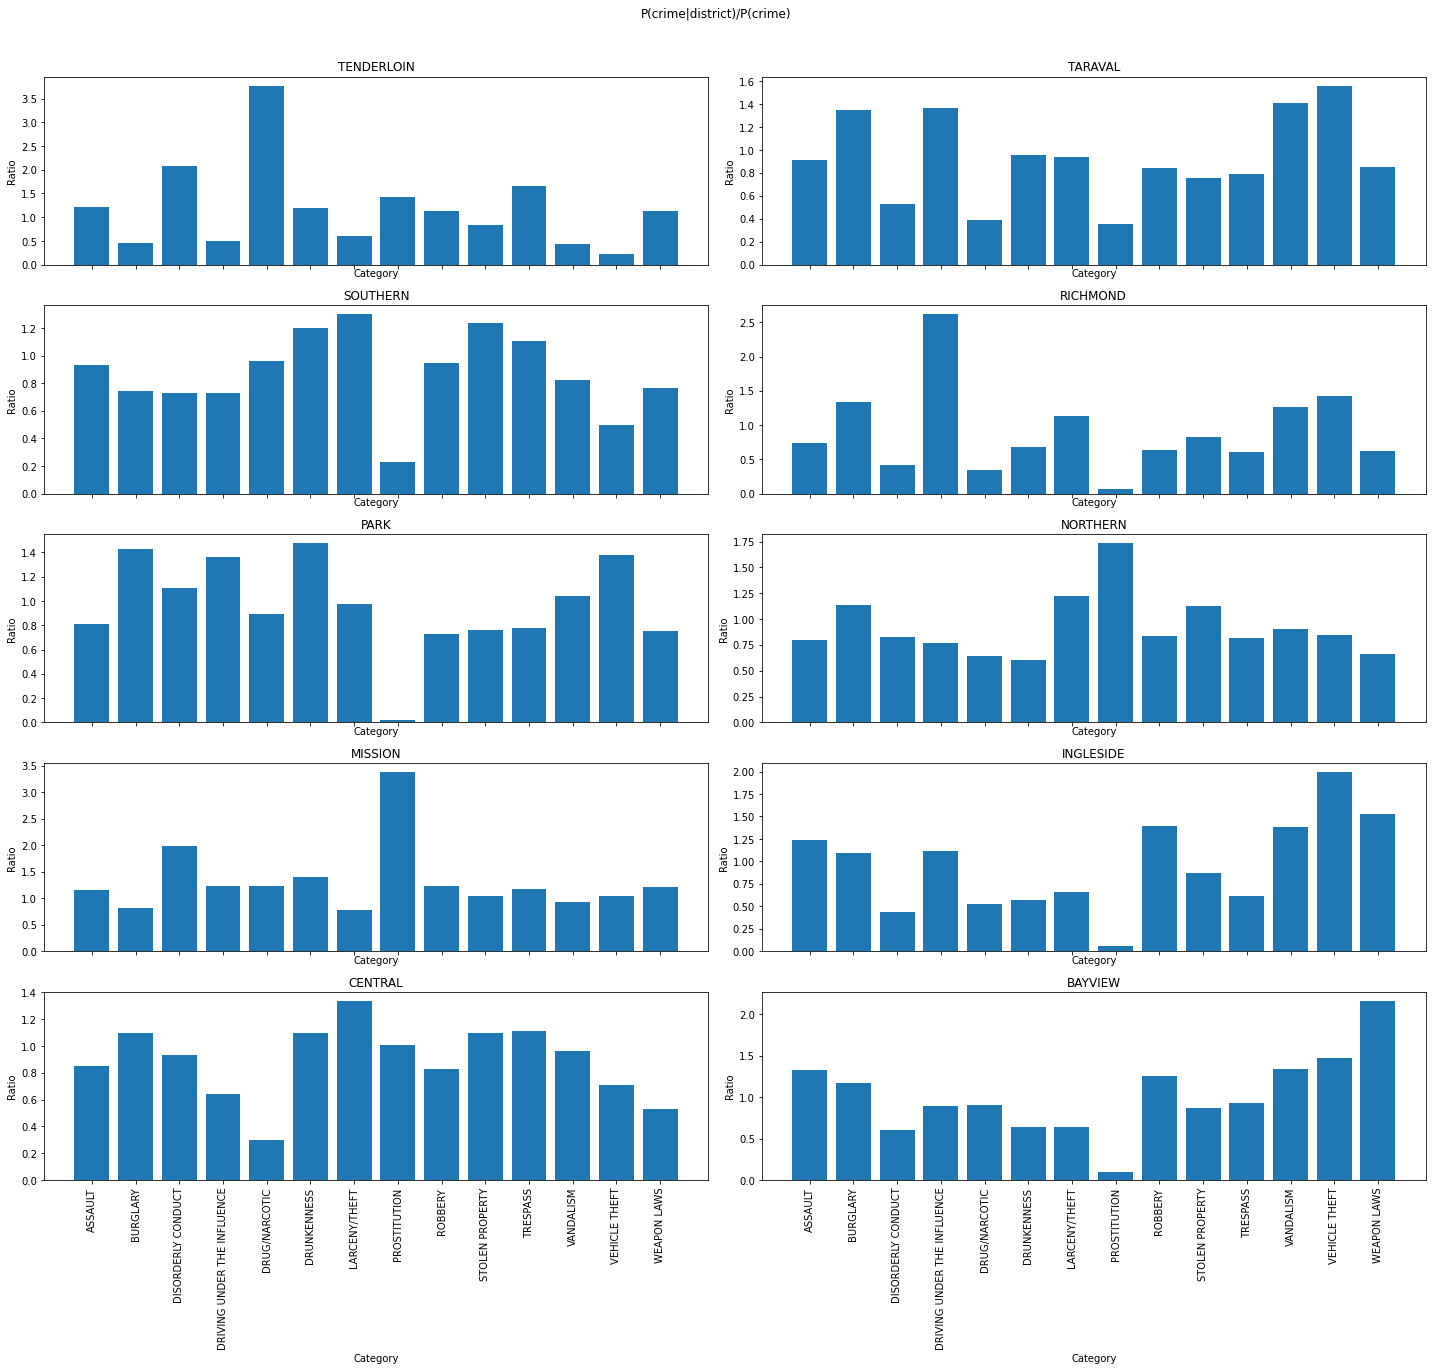

In [21]:
# Exercise 2.2

SF_Police_Districts = police_incidence_reports['PdDistrict'].unique()

SF_Police_District_most_crimes = police_incidence_reports.groupby(['PdDistrict']).agg({'PdId':'count'})\
    .sort_values(by=['PdId'], ascending = False).rename(columns={'PdId':'Counts'}).reset_index().iloc[:1]

SF_Police_District_most_focuscrimes = focuscrimes.groupby(['PdDistrict']).agg({'PdId':'count'})\
    .sort_values(by=['PdId'], ascending = False).rename(columns={'PdId':'Counts'}).reset_index().iloc[:1]

# P(crime)

crimes_by_category = focuscrimes.groupby(['Category']).agg({'PdId':'count'})\
    .sort_values(by=['PdId'], ascending = False).rename(columns={'PdId':'Counts'}).reset_index()
sum_crimes = len(focuscrimes.index)
crimes_by_category['Counts Normalized'] = crimes_by_category['Counts']/sum_crimes

# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# crimes_by_category_normalized = pd.DataFrame(scaler.fit_transform(pd.DataFrame(crimes_by_category['Counts'])))
# crimes_by_category = pd.concat([crimes_by_category, crimes_by_category_normalized], axis = 1)
# crimes_by_category.rename(columns={0:'Counts Normalized'}, inplace=True)

# P(crime|district)

crimes_by_category_district = focuscrimes.groupby(['Category', 'PdDistrict']).agg({'PdId':'count'})\
    .sort_values(by=['PdDistrict'], ascending = False).rename(columns={'PdId':'Counts'}).reset_index()

for i in crimes_by_category_district['PdDistrict'].unique():
    data_loop = crimes_by_category_district.loc[crimes_by_category_district['PdDistrict'].isin([i])]
    sum_crimes_loop = data_loop['Counts'].sum()
    crimes_by_category_normalized = pd.DataFrame(data_loop['Counts'].values/sum_crimes_loop)

    if i == crimes_by_category_district['PdDistrict'].unique()[0]:
        crimes_by_category_district_normalized = crimes_by_category_normalized
    else:
        crimes_by_category_district_normalized = pd.concat([crimes_by_category_district_normalized, crimes_by_category_normalized])

crimes_by_category_district_normalized = crimes_by_category_district_normalized.reset_index(drop=True)
crimes_by_category_district = pd.concat([crimes_by_category_district, crimes_by_category_district_normalized], axis=1)
crimes_by_category_district.rename(columns={0:'Counts Normalized'}, inplace=True)

# P(crime|district)/P(crime) e.g. P(Weapon laws| Tenderloin)/P(Weapon laws)

crimes_by_category_district = pd.merge(crimes_by_category_district, crimes_by_category, on = 'Category')
crimes_by_category_district.rename(columns={'Counts_x': 'Counts District', 'Counts Normalized_x': 'Counts Normalized District',\
    'Counts_y': 'Counts Category', 'Counts Normalized_y': 'Counts Normalized Category'}, inplace=True)
crimes_by_category_district['Ratio Normalized'] = crimes_by_category_district['Counts Normalized District']/crimes_by_category_district['Counts Normalized Category']

crimes_by_category_district.rename(columns={'Counts_x': 'Counts District', 'Counts Normalized_x': 'Counts Normalized District',\
    'Counts_y': 'Counts Category', 'Counts Normalized_y': 'Counts Normalized Category'}, inplace=True)
crimes_by_category_district['Ratio'] = crimes_by_category_district['Counts District']/crimes_by_category_district['Counts Category']

focuscrimes_cat = pd.DataFrame(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])
focuscrimes_cat.rename(columns={0:'Category'}, inplace=True)
focuscrimes_by_category_district = pd.merge(focuscrimes_cat, crimes_by_category_district, on = 'Category')
focuscrimes_by_category_district.sort_values(by=['PdDistrict', 'Category'])

# plot 

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(20, 20), sharex=True)

m = 0 # falls n = 1 -> m + 1 und nach plot n wieder auf 0 setzen
n = 0 # 0 oder 1
for i in focuscrimes_by_category_district['PdDistrict'].unique():
    if n == 1:
        y = focuscrimes_by_category_district.loc[focuscrimes_by_category_district['PdDistrict'].isin([i])]
        y = y.sort_values(by = 'Category')
        axs[m,n].bar(x = np.sort(y['Category'].unique()), height = y['Ratio Normalized'])
        axs[m,n].tick_params(axis='x', rotation=90)
        axs[m,n].set_title(i)
        axs[m,n].set_xlabel('Category')
        axs[m,n].set_ylabel('Ratio')
        m = m + 1
        n = 0
    else:
        y = focuscrimes_by_category_district.loc[focuscrimes_by_category_district['PdDistrict'].isin([i])]
        y = y.sort_values(by = 'Category')
        axs[m,n].bar(x = np.sort(y['Category'].unique()), height = y['Ratio Normalized'])
        axs[m,n].tick_params(axis='x', rotation=90)
        axs[m,n].set_title(i)
        axs[m,n].set_xlabel('Category')
        axs[m,n].set_ylabel('Ratio')
        n = 1
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle('P(crime|district)/P(crime)')
plt.show()


# Werte fühlen sich leicht falsch an.


## Part 3: Visualizing geodata with Plotly

So visualizing geodata used to be difficult, but with `Plotly` things have gotten easier. 

Like matplotlib, Plotly is an [open-source data visualization library](https://plotly.com/python/), but it's aimed at making interactive visualizations that can be rendered in a web browser (or jupyter notebook). You can read about it and learn how to install it [here](https://plotly.com/python/getting-started/).

That means that we can easily draw on the fact that the crime data has lots of exciting geo-data attached. The map we're going to be creating is called a **[choropleth map](https://en.wikipedia.org/wiki/Choropleth_map)** (more on these later), which is basically a map, where we color in shapefiles (more on this below) based on some value that we care about. We'll take our inspiration from Plotly's gentle intro to [Choropleth maps](https://plotly.com/python/mapbox-county-choropleth/)

The thing we want to look into is the SF police districts, shown below (image stolen from [this page](https://hoodline.com/2015/07/citywide-sfpd-redistricting-to-take-effect-sunday/)).

![districts from web](https://raw.githubusercontent.com/suneman/socialdata2021/master/files/sfpdfinal.png)

But because we are cool programmers, we want to create our own maps, **with our own information on them**. Let's do it!

> *Exercise 3a*: Let's plot a map with some random values in it.
>
> What we need to do to get going is to create some random data. Below is a little dictionary with a random value for each district that you can use if you want your plots to look like mine.

In [10]:
randomdata = {'CENTRAL': 0.8903601342256143,
 'SOUTHERN': 0.8642882941363439,
 'BAYVIEW': 0.925634097746596,
 'MISSION': 0.7369022697287458,
 'PARK': 0.9864113307070926,
 'RICHMOND': 0.5422239624697017,
 'INGLESIDE': 0.5754056712571605,
 'TARAVAL': 0.5834730737348696,
 'NORTHERN': 0.08148199528212985,
 'TENDERLOIN': 0.37014287986350447};

> *Exercise 3a* continued:
>
> For this exercise, we'll use use the random values above and we'll also need some *shape-files*.
> [Shapefiles can have many different formats](https://en.wikipedia.org/wiki/Shapefile). Because we are brilliant teachers and an all-round standup people, we are sharing the shapefiles as [`geojson`](https://en.wikipedia.org/wiki/GeoJSON), which is an easy-to-use format for shapefiles based on `json`.
>
> * Download the SFPD District shapefiles **[here](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/sfpd.geojson)**
> * Now that you have the shapefiles, you can follow the example here: https://plotly.com/python/mapbox-county-choropleth/ but with the following modifications:
>    * In the example the `id` is a so-called FIPS code. In our case the `id` is the `DISTRICT`
>    * You will have to convert the dictionary of random values I included above to a Pandas dataframe with the right column headings.
>    * The data used in the example has a range between zero and 12. Your data is between $[0,1]$. So you'll need to modify the plotting command to accound for that change.
>    * You should also change the map to display the right zoom level.
>    * And the map should center on San Francisco's `lat` and `lon`.
> * Now you can create your map.

Mine looks something like this.

![map_example.png](https://raw.githubusercontent.com/suneman/socialdata2021/master/files/map_example.png)

You're encouraged to play around with other settings, color schemes, etc.

In [11]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/suneman/socialdata2022/main/files/sfpd.geojson') as response:
    SF_districts = json.load(response)

import pandas as pd

randomdata = pd.DataFrame.from_dict({'SF_districts':randomdata.keys(),'Headings':randomdata.values()})


In [12]:
import plotly.express as px

fig = px.choropleth_mapbox(randomdata, geojson=SF_districts, locations='SF_districts', color='Headings',
                           color_continuous_scale="Viridis",
                           range_color=(0, 1),
                           mapbox_style="carto-positron",
                           zoom=10.8, center = {"lat": 37.773972, "lon": -122.431297},
                           opacity=0.5,
                           labels={'unemp':'unemployment rate'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


> *Exercise 3b:* But it's crime-data. Let's do something useful and **visualize where it is safest to leave your car on a Sunday**.
> 
> Take a moment to congratulate yourself. You now know how to create cool plots!
> * Now, we can focus on our main goal: *determine the districts where you should (and should not) leave your car on Sundays*. (Or stated differently, count up the number of thefts.)
> * To do so, first:
>  * Filter the crime dataset by the `DayOfWeek` category and also choose the appropriate crime category.
>  * Aggregate data by police district.
> * To create the plot, remember that your range of data-values is different from before, so you'll have to change the plotly command a bit.
> * **Based on your map and analysis, where should you park the car for it to be safest on a Sunday? And where's the worst place?**
> * Using visualizatios can help us uncover powerful data-patterns. However, when designing visualizations, we need to be aware of several illusions that can lead viewers to misinterpret the data we are showing (i.e. *perceptual errors*):
>    * Try to change the range of data-values in the plot above. Is there a way to make the difference between district less evident? 
>    * Why do you think perceptual errors are a problem? Try to think of a few examples. You can have a look at this [article](https://www.businessinsider.com/fox-news-obamacare-chart-2014-3?r=US&IR=T) to get some inspiration.
> * *Try this for Extra credit:*
>     * Create plots for the same crime type, but different days, and comment on the results.

In [13]:
# vehicle theft = appropriate crime category + DayOfWeek = Sunday

vehicle_theft_sunday = police_incidence_reports.loc[(police_incidence_reports['Category']=='VEHICLE THEFT') &\
    (police_incidence_reports['DayOfWeek']=='Sunday')].groupby('PdDistrict').agg({'PdId':'count'}).rename(columns={'PdId':'Counts'})\
    .reset_index()

fig = px.choropleth_mapbox(vehicle_theft_sunday, geojson=SF_districts, locations='PdDistrict', color='Counts',
                           color_continuous_scale="Viridis",
                           range_color=(vehicle_theft_sunday['Counts'].min(), vehicle_theft_sunday['Counts'].max()),
                           mapbox_style="carto-positron",
                           zoom=10.8, center = {"lat": 37.773972, "lon": -122.431297},
                           opacity=0.5,
                           labels={'unemp':'unemployment rate'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()